In [110]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [3]:
# Import dataframes from CSV
file_path = "Resources/Diamonds Prices2022.csv"
diamond_df = pd.read_csv(file_path)

In [4]:
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Data Cleaning

In [6]:
# Remove irrelevant columns
diamond_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
# Check null values
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No NULL values in dataframe

# Data Visualization

# Cut vs. Prices

In [8]:
#cut_df = diamond_df.groupby("cut", as_index=False)["price"].mean()
cut_df = diamond_df[["cut", "price"]]
cut_df.head()

,cut,price
0,Ideal,326
1,Premium,326
2,Good,327
3,Premium,334
4,Good,335


<AxesSubplot:xlabel='cut', ylabel='price'>

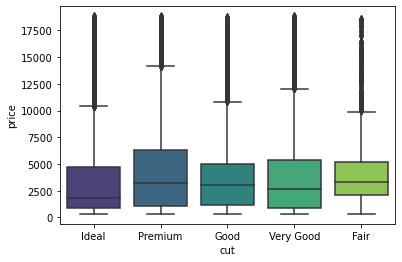

In [9]:
sns.boxplot(data=cut_df, x="cut", y="price", palette="viridis")

# Clarity vs. Prices

In [10]:
#clarity_df = diamond_df.groupby("clarity", as_index=False)["price"].mean()
clarity_df = diamond_df[["clarity", "price"]]
clarity_df.head()

,clarity,price
0,SI2,326
1,SI1,326
2,VS1,327
3,VS2,334
4,SI2,335


<AxesSubplot:xlabel='clarity', ylabel='price'>

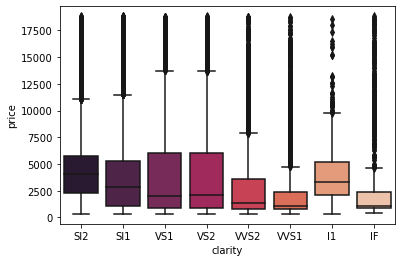

In [11]:
sns.boxplot(data=clarity_df, x="clarity", y="price", palette = "rocket")

# Color vs. Prices

In [12]:
#color_df = diamond_df.groupby("color", as_index=False)["price"].mean()
color_df = diamond_df[["color", "price"]]
color_df.head()

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,J,335


<AxesSubplot:xlabel='color', ylabel='price'>

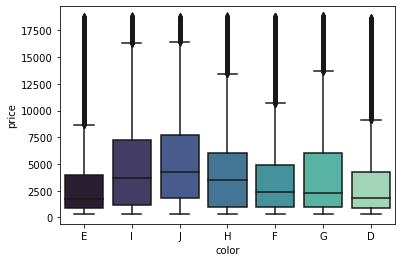

In [13]:
sns.boxplot(data=color_df, x="color", y="price", palette = "mako")

# Table vs. Price

In [14]:
table_df = diamond_df[["table", "price"]]
table_df.head()

,table,price
0,55.0,326
1,61.0,326
2,65.0,327
3,58.0,334
4,58.0,335


<AxesSubplot:xlabel='table', ylabel='price'>

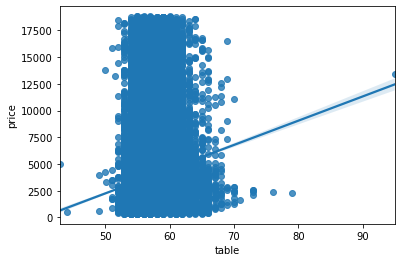

In [15]:
sns.regplot(data=table_df, x="table", y="price", scatter=True)

In [16]:
# Determine correlation efficient
table_df.corr()

,table,price
table,1.000000,0.127118
price,0.127118,1.000000


table and price are not highly correlated, excluded from machine learning

Text(0.5, 1.0, 'Distribution of table')

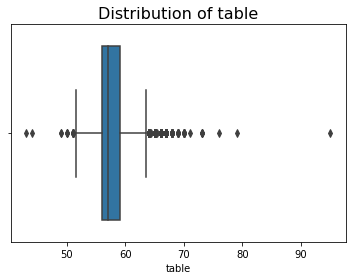

In [17]:
# Explore distribution of data of table
ax = sns.boxplot(x="table",data=table_df)
ax.set_title('Distribution of table', fontsize=16)

# Depth vs. Price

In [18]:
depth_df = diamond_df[["depth", "price"]]
depth_df.head()

,depth,price
0,61.5,326
1,59.8,326
2,56.9,327
3,62.4,334
4,63.3,335


<AxesSubplot:xlabel='depth', ylabel='price'>

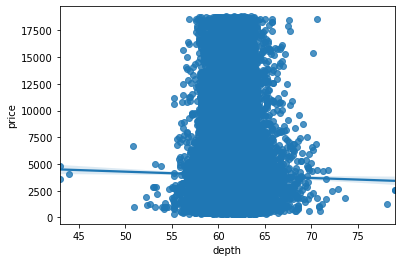

In [19]:
sns.regplot(data=depth_df, x="depth", y="price", scatter=True)

In [20]:
# Determine correlation efficient
depth_df.corr()

,depth,price
depth,1.00000,-0.01063
price,-0.01063,1.00000


There is bearly any trend between table and prices, therefore we are going to take a look at the distribution of depth.

Text(0.5, 1.0, 'Distribution of depth')

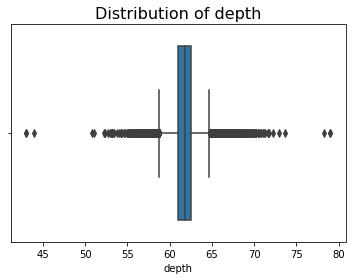

In [21]:
# Explore distribution of data of depth
ax = sns.boxplot(x="depth",data=depth_df)
ax.set_title('Distribution of depth', fontsize=16)

# Pairwise relationships

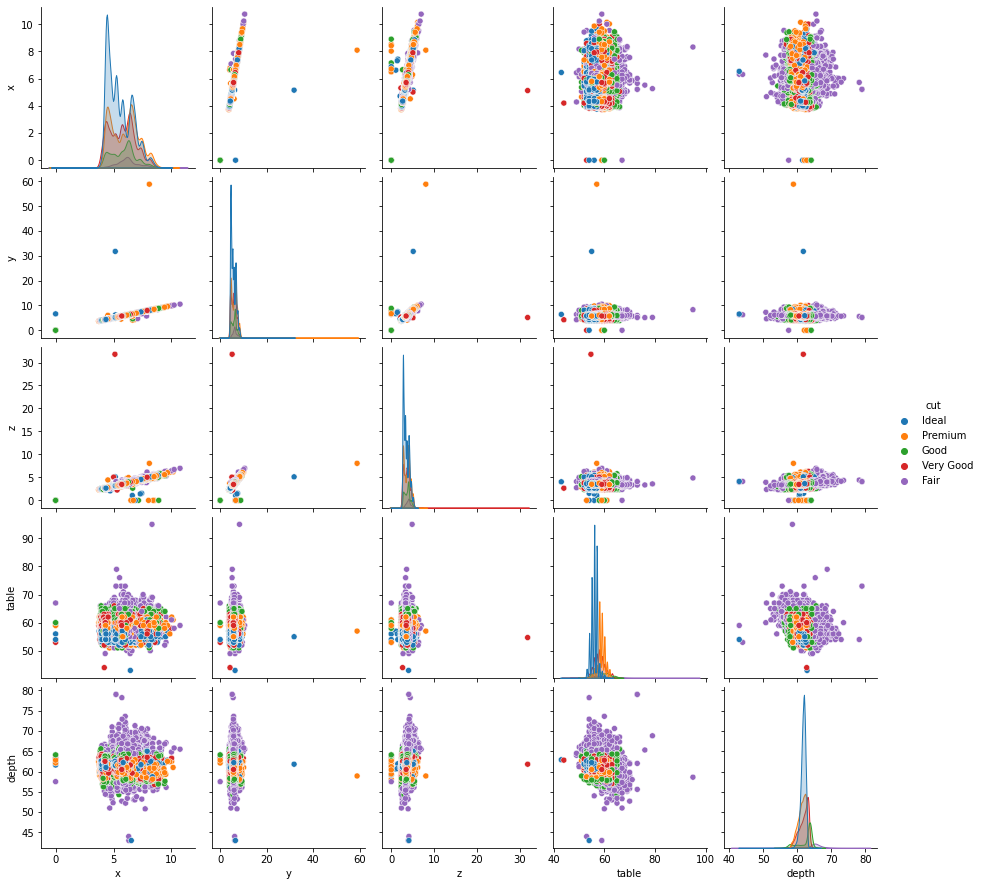

In [22]:
c = sns.pairplot(diamond_df, vars=["x", "y","z","table","depth"], hue="cut")

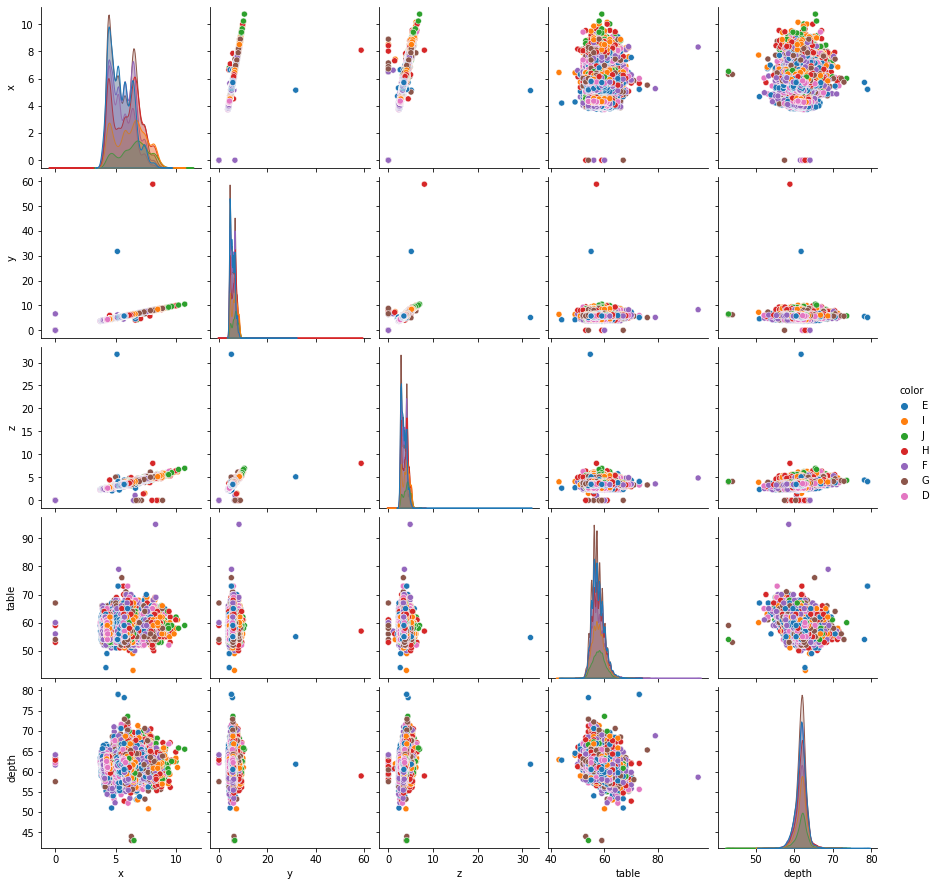

In [23]:
d = sns.pairplot(diamond_df, vars=["x", "y","z","table","depth"], hue="color")

Text(0.5, 1.0, 'Correlation Heatmap')

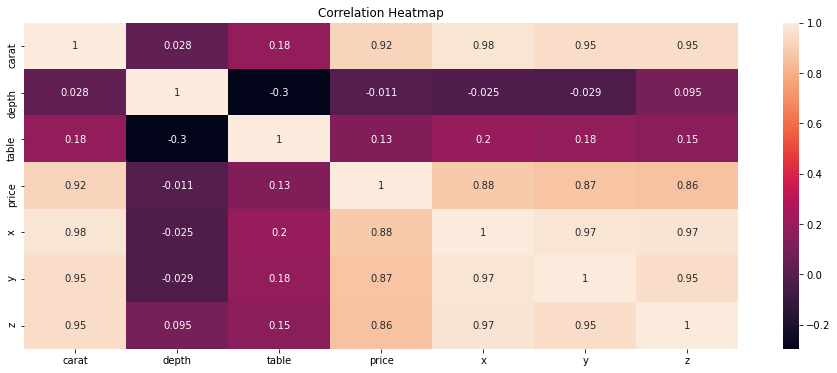

In [41]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(diamond_df.corr(method="pearson"), annot=True)
heatmap.set_title("Correlation Heatmap")

Can see that prices are highly corrrelated with x, y, z and carat, try and apply linear regression for prediction

# Machine Learning and Predict

In [118]:
# Select columns that will be included in machine learning
diamond_ml = diamond_df.drop(["depth", "table"], axis=1)

In [119]:
# Convert categorical columns "color", "cut" and "clarity" by using get dummies
diamond_ml = pd.get_dummies(diamond_ml, columns=["cut","color","clarity"], prefix=["cut","color","clarity"])

In [120]:
diamond_ml.head()

,carat,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [121]:
X = diamond_ml.drop("price", axis=1)
y = diamond_ml.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [122]:
# Fit into Random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9805479825780776

In [123]:
model.score(X_train, y_train)

0.9972257471468722

Both scores for training and testing sets are close to 1, not overfitting.

In [42]:
from sklearn.linear_model import LinearRegression

In [124]:
# Fit into linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.917525515336396

# LightGBM

In [103]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error 

In [104]:
clf = lgb.LGBMRegressor()
clf.fit(X_train, y_train)

LGBMRegressor()

In [105]:
y_pred=clf.predict(X_test)

In [107]:
error = mean_squared_log_error(y_test, y_pred)
error

0.012102112552622394

In [108]:
error ** 0.5

0.11000960209282822

# Predict by using neural networks

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [65]:
# Fit training data into Neural Network model
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
# Create Neural Network model
model =  Sequential()
model.add(Dense(units=4, activation="ReLU", input_dim=X_train.shape[1]))
model.add(Dense(units=4, activation="Softmax"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["mean_absolute_error"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 104       
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train, y_train, epochs=100, shuffle=True)

Epoch 1/100
1265/1265 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - mean_absolute_error: 3929.7336
Epoch 2/100
1265/1265 [==============================] - 1s 972us/step - loss: 0.0000e+00 - mean_absolute_error: 3929.6348
Epoch 3/100
1265/1265 [==============================] - 1s 973us/step - loss: 0.0000e+00 - mean_absolute_error: 3929.6252
Epoch 4/100
1265/1265 [==============================] - 1s 974us/step - loss: 0.0000e+00 - mean_absolute_error: 3929.6150
Epoch 5/100
1265/1265 [==============================] - 1s 983us/step - loss: 0.0000e+00 - mean_absolute_error: 3929.6138
Epoch 6/100
1265/1265 [==============================] - 1s 986us/step - loss: 0.0000e+00 - mean_absolute_error: 3929.6152
Epoch 7/100
1265/1265 [==============================] - 1s 984us/step - loss: 0.0000e+00 - mean_absolute_error: 3929.6162
Epoch 8/100
1265/1265 [==============================] - 1s 985us/step - loss: 0.0000e+00 - mean_absolute_error: 3929.6152
Epoch 9/100
1265/1

In [79]:
predictions = model.predict(X_test)

422/422 [==============================] - 0s 578us/step


In [80]:
accu = accuracy_score(y_test, predictions, normalize=True)

In [81]:
accu

0.0